# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [47]:
import pandas as pd

# Carregando a base
application_record = pd.read_csv('../../../../Datasets/application_record.csv')
credit_record = pd.read_csv('../../../../Datasets/credit_record.csv')

In [48]:
print(application_record.shape)
application_record.head(20)

(438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [49]:
credit_record['ID'].nunique()

45985

In [50]:
application_record['ID'].nunique()

438510

In [51]:
# verificando se têm id duplicados

print(application_record.duplicated().sum())

0


In [52]:
print(credit_record.shape)
credit_record.head(20)

(1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [53]:
# Transformando STATUS em uma variável binária 'mau'
credit_record['mau'] = credit_record['STATUS'].apply(lambda x: 1 if x in ['0', '1', '2', '3', '4', '5'] else 0)

# Agregando para descobrir se algum registro é 'mau'
credit_summary = credit_record.groupby('ID')['mau'].max()

# Transformando o Series resultante em DataFrame
credit_summary = credit_summary.reset_index()
credit_summary.rename(columns={'mau': 'mau'}, inplace=True)


In [54]:

#junção das bases
df = pd.merge(application_record, credit_summary, on='ID', how='inner')


In [55]:
print(df.shape)
df.head(20)

(36457, 19)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,mau
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,1
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,1
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,1


In [56]:
#distibuição da variável resposta 'mau'
df['mau'].value_counts()

1    32002
0     4455
Name: mau, dtype: int64

Verificando a quantidade de missings

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [58]:
percentage = (df.isnull().sum() / len(df)) * 100
percentage

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        31.058507
CNT_FAM_MEMBERS         0.000000
mau                     0.000000
dtype: float64

In [59]:
df['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

podemos tratar os missings da variável OCCUPATION_TYPE com dummies para cada categoria e o missing apenas seria false para todas as categorias.
30% dos dados da variável OCCUPATION_TYPE são missing, então não podemos simplesmente excluir esses dados.

In [60]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Desconhecido')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

##### Verificando a quantidade de duplicados

In [62]:
df.duplicated().sum()

0

##### Distribuição da variável resposta

<Axes: xlabel='mau', ylabel='count'>

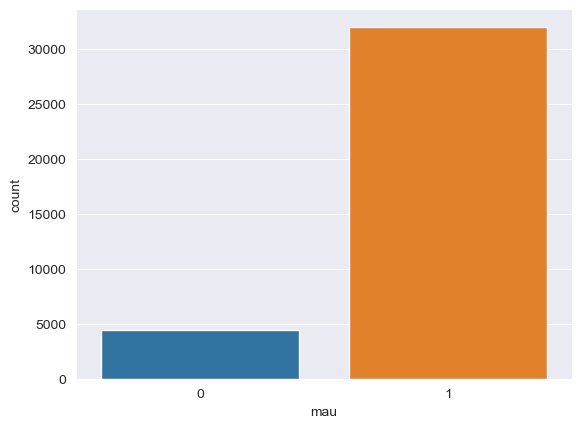

In [63]:
import seaborn as sns
# normal distribution
sns.countplot(x='mau', data=df)


Teremos que tratar para um problema de classificação.
Binário (Bom/Mau crédito):

Bom crédito: 'C' (quitado naquele mês), 'X' (sem empréstimo para o mês)
Mau crédito: '0', '1', '2', '3', '4', '5' (qualquer forma de atraso ou inadimplência)

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [64]:
# 1. Criando um dataframe com os nomes de cada variável e o tipo de dados de cada variável
metadados = pd.DataFrame({'variavel': df.columns, 'tipo': df.dtypes})

In [65]:
# 2. Adicionando uma coluna nesse dataframe chamada "qtd_categorias" e colocando nela o número de categorias correspondente de cada variável

qtd_categorias = [] # Iniciando uma lista vazia


for variavel in df.columns: # Fazendo um for ao longo dos nomes das variáveis
    
    
    qtd = df[variavel].nunique() # Contando o número de categorias dessa variável
    
    
    qtd_categorias.append(qtd) # adicionando essa informação na lista que criamos


metadados['qtd_categorias'] = qtd_categorias # Atribuindo a lista à nossa variável

In [66]:
metadados.head(21)

,variavel,tipo,qtd_categorias
ID,ID,int64,36457
CODE_GENDER,CODE_GENDER,object,2
FLAG_OWN_CAR,FLAG_OWN_CAR,object,2
FLAG_OWN_REALTY,FLAG_OWN_REALTY,object,2
CNT_CHILDREN,CNT_CHILDREN,int64,9
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,float64,265
NAME_INCOME_TYPE,NAME_INCOME_TYPE,object,5
NAME_EDUCATION_TYPE,NAME_EDUCATION_TYPE,object,5
NAME_FAMILY_STATUS,NAME_FAMILY_STATUS,object,5
NAME_HOUSING_TYPE,NAME_HOUSING_TYPE,object,6


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [67]:
# Criando variáveis dummy para as variáveis necessárias e removendo as variáveis que foram substituídas por dummies
df = pd.get_dummies(df, columns=[   'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'], drop_first=True)
df.reset_index(drop=True, inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 49 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 36457 non-null  int64  
 1   CNT_CHILDREN                                       36457 non-null  int64  
 2   AMT_INCOME_TOTAL                                   36457 non-null  float64
 3   DAYS_BIRTH                                         36457 non-null  int64  
 4   DAYS_EMPLOYED                                      36457 non-null  int64  
 5   FLAG_MOBIL                                         36457 non-null  int64  
 6   FLAG_WORK_PHONE                                    36457 non-null  int64  
 7   FLAG_PHONE                                         36457 non-null  int64  
 8   FLAG_EMAIL                                         36457 non-null  int64  
 9   CNT_FA

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

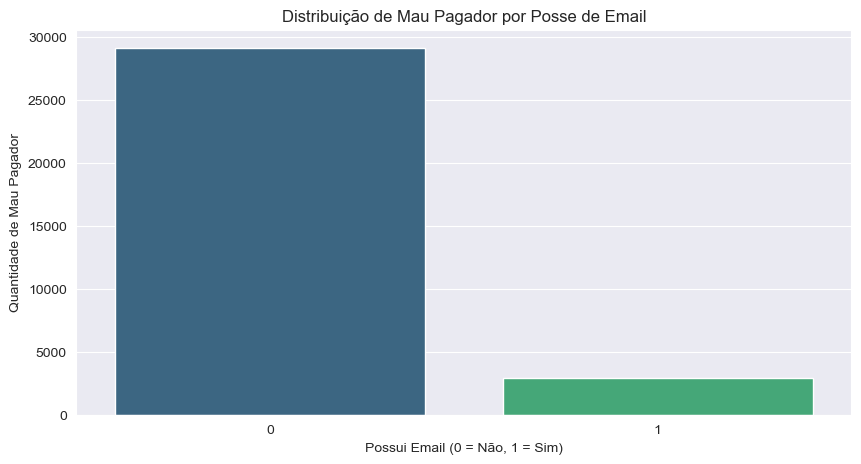

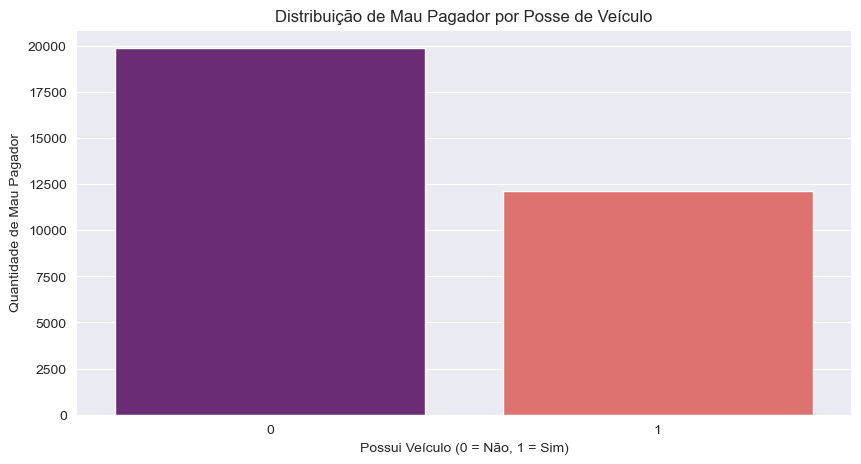

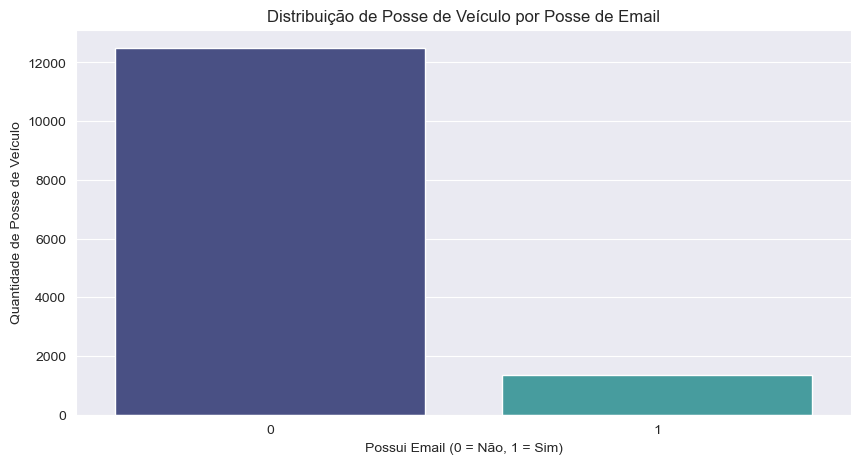

In [69]:
import matplotlib.pyplot as plt

crosstab_email = pd.crosstab(df['FLAG_EMAIL'], df['mau'])
crosstab_veiculo = pd.crosstab(df['FLAG_OWN_CAR_Y'], df['mau'])


# Plotando gráfico de barras para 'possui_email'
plt.figure(figsize=(10, 5))
sns.barplot(x=crosstab_email.index, y=crosstab_email[1], palette="viridis")
plt.title('Distribuição de Mau Pagador por Posse de Email')
plt.ylabel('Quantidade de Mau Pagador')
plt.xlabel('Possui Email (0 = Não, 1 = Sim)')
plt.show()

# Plotando gráfico de barras para 'posse_de_veiculo'
plt.figure(figsize=(10, 5))
sns.barplot(x=crosstab_veiculo.index, y=crosstab_veiculo[1], palette="magma")
plt.title('Distribuição de Mau Pagador por Posse de Veículo')
plt.ylabel('Quantidade de Mau Pagador')
plt.xlabel('Possui Veículo (0 = Não, 1 = Sim)')
plt.show()

# Tabela cruzada entre 'possui_email' e 'posse_de_veiculo'
crosstab_email_veiculo = pd.crosstab(df['FLAG_EMAIL'], df['FLAG_OWN_CAR_Y'])
# Plotando gráfico de barras para 'possui_email' e 'posse_de_veiculo'
plt.figure(figsize=(10, 5))
sns.barplot(x=crosstab_email_veiculo.index, y=crosstab_email_veiculo[1], palette="mako")
plt.title('Distribuição de Posse de Veículo por Posse de Email')
plt.ylabel('Quantidade de Posse de Veículo')
plt.xlabel('Possui Email (0 = Não, 1 = Sim)')
plt.show()



#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [70]:
# Salvando a base
df.to_csv('demo01.csv', index=False)